Consumer shopping on the internet is growing year by year. However, the conversion rates have remained more or less the same. For example, most of us browse through e-commerce websites such as Amazon, perhaps adding items to a wish list or even an online shopping cart, only to end up buying nothing.

From this common truth comes the need for tools and solutions that can customize promotions and advertisements for online shoppers and improve this conversion. In this chapter, we will be analyzing various factors that affect a purchaser's decision.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


we use robustscaler because it is better fit for outliers, so we use first robust scaler and then we apply standard scaler or minmaxscaler.

Links I read : https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [3]:
df = pd.read_csv('C:/Users/0023ND744/Desktop/my_notebooks/data_analysis_ws/The-Data-Analysis-Workshop-master/Chapter05/Datasets/online_shoppers_intention.csv')
#df= pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter05/Datasets/online_shoppers_intention.csv")

In [5]:
df.head(25)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Exploratory Data Analysis

We can split exploratory data analytics into three parts:

- Univariate analysis
- Bivariate analysis
- Linear relationships

In [8]:
# what is univariate analysis?
# Univariate analysis is the simplest form of analysis and is where we analyze each feature
# (column of a DataFrame) and try to uncover the pattern or distribution of the data

Revenue column
Visitor type
Traffic type
Region
Weekend-wise distribution
Browser and operating system
Administrative page
Information page
Special day

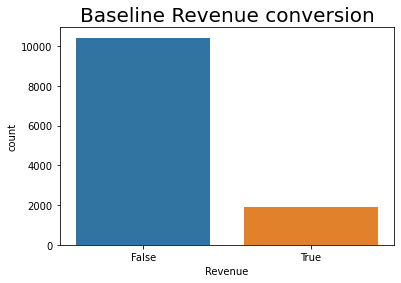

In [9]:
#Revenue Column
#This feature simply refers to how many of the online shopping sessions ended in a purchase.

sns.countplot(df['Revenue'])
plt.title('Baseline Revenue conversion', fontsize = 20)
plt.show()

In [12]:
print(df['Revenue'].value_counts())
#print()
#print(df['Revenue'].value_counts(normalize=True))

# so false means this many nr of customers did not make the purchase

False    10422
True      1908
Name: Revenue, dtype: int64


In [13]:
print(df['Revenue'].value_counts(normalize=True)) # normalize from sklearn preprocessing

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


Visitor-Wise Distribution
Now, let's look at the distribution of visitors to the website. We want to determine which visitor type is most frequent—whether this is new visitors, returning visitors, or any other category.

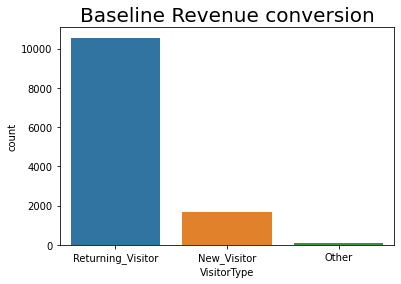

In [14]:
sns.countplot(df['VisitorType'])
plt.title('Baseline Revenue conversion', fontsize = 20)
plt.show()

In [15]:
print(df['VisitorType'].value_counts())

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


Traffic-Wise Distribution
Now, let's consider the distribution of traffic. We want to find out how the visitors visit our page to determine what amount of site traffic is accounted for by direct visitors (meaning they enter the URL into the browser) and how much is generated through other mediums, such as blogs or advertisements.

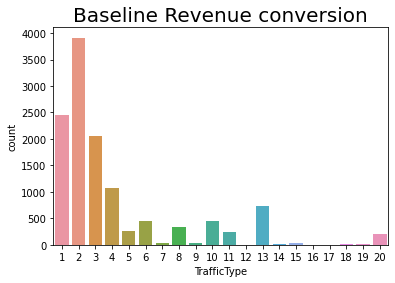

In [16]:
sns.countplot(df['TrafficType'])
plt.title('Baseline Revenue conversion', fontsize = 20)
plt.show()

consider the distribution of customers over days of the week to determine whether customers are more active on weekends or weekdays.

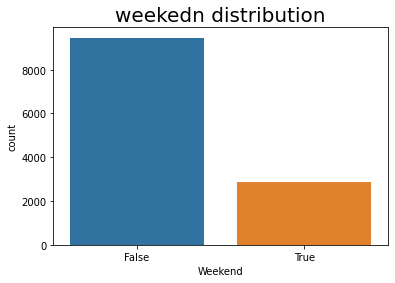

In [17]:
sns.countplot(df['Weekend'])
plt.title('weekedn distribution', fontsize = 20)
plt.show()

**From the count of the False subcategory, we can see that more visitors visit during weekdays than weekend days.**

Region wise distribution

look at the region-wise distribution of the sessions. The main motive behind this analysis is to find out which region has the highest number of visitors visiting our website.

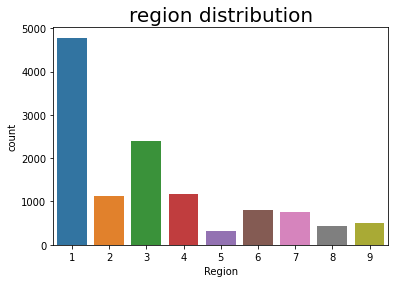

In [19]:
sns.countplot(df['Region'])
plt.title('region distribution', fontsize = 20)
plt.show()

**From the preceding data, we can see that regions 1 and 3 account for 50% of online sessions; thus, we can infer that regions 1 and 3 are where most potential consumers reside.**

#### Analyzing the Browser and OS Distribution of Customers

This information will allow us to configure our website so that we can make it more responsive and user-friendly.

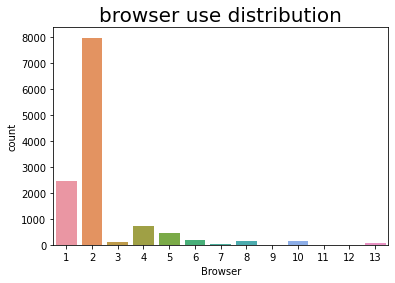

In [20]:
sns.countplot(df['Browser'])
plt.title('browser use distribution', fontsize = 20)
plt.show()

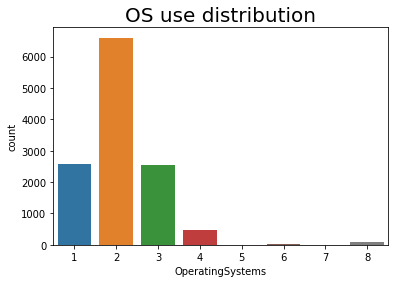

In [21]:
# now OS type
sns.countplot(df['OperatingSystems'])
plt.title('OS use distribution', fontsize = 20)
plt.show()

Special Day Session Distribution

In this section, we will be looking at the number of visitors during a special day. We would like to know whether special days (such as Valentine's Day) impact the number of users visiting our website.

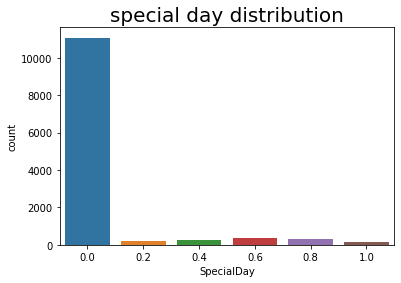

In [22]:
sns.countplot(df['SpecialDay'])
plt.title('special day distribution', fontsize = 20)
plt.show()

**we can see that special days have no impact on the number of visitors to our website**

### Bivariate Analysis

Bivariate analysis is performed between two variables to look at their relationship—for example, to determine which type of browser leads to a successful transaction, or which region has the highest number of customers who ended up making a transaction.

performing bivariate analysis between the revenue column and the following categories:

Visitor type
Traffic type
Region
Browser type
Operating system
Month
Special day

In [25]:
# Revenue Versus Visitor Type
# plotting a categorical plot between Revenue and VisitorType. The categorical plot gives you the number of users in each subcategory, and whether each culminated in a purchase. 
# The plot will define those users who did make a purchase as True, and those who did not as False:

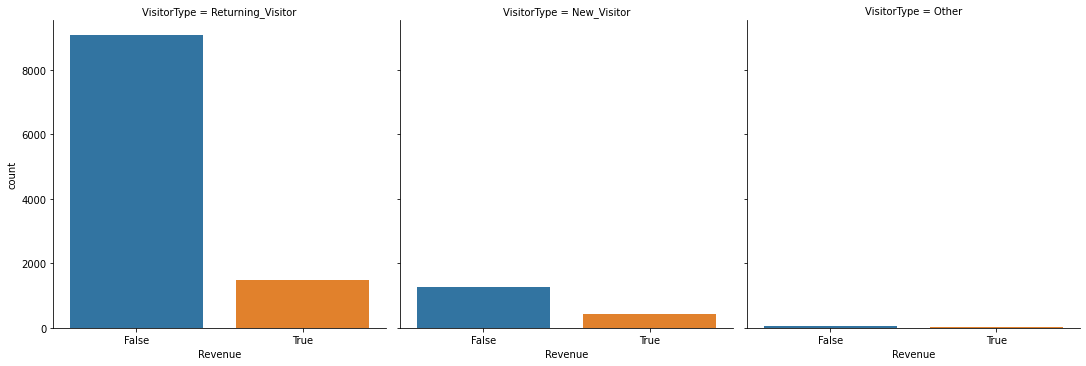

In [26]:
g = sns.catplot("Revenue", col="VisitorType", col_wrap=3,data=df,kind="count", height=5, aspect=1)
plt.show()

**more revenue conversions happen for returning customers than new customers. This clearly implies that we need to find ways to incentivize new customers to make a transaction with us.**

In [28]:
# Revenue Versus Traffic Type

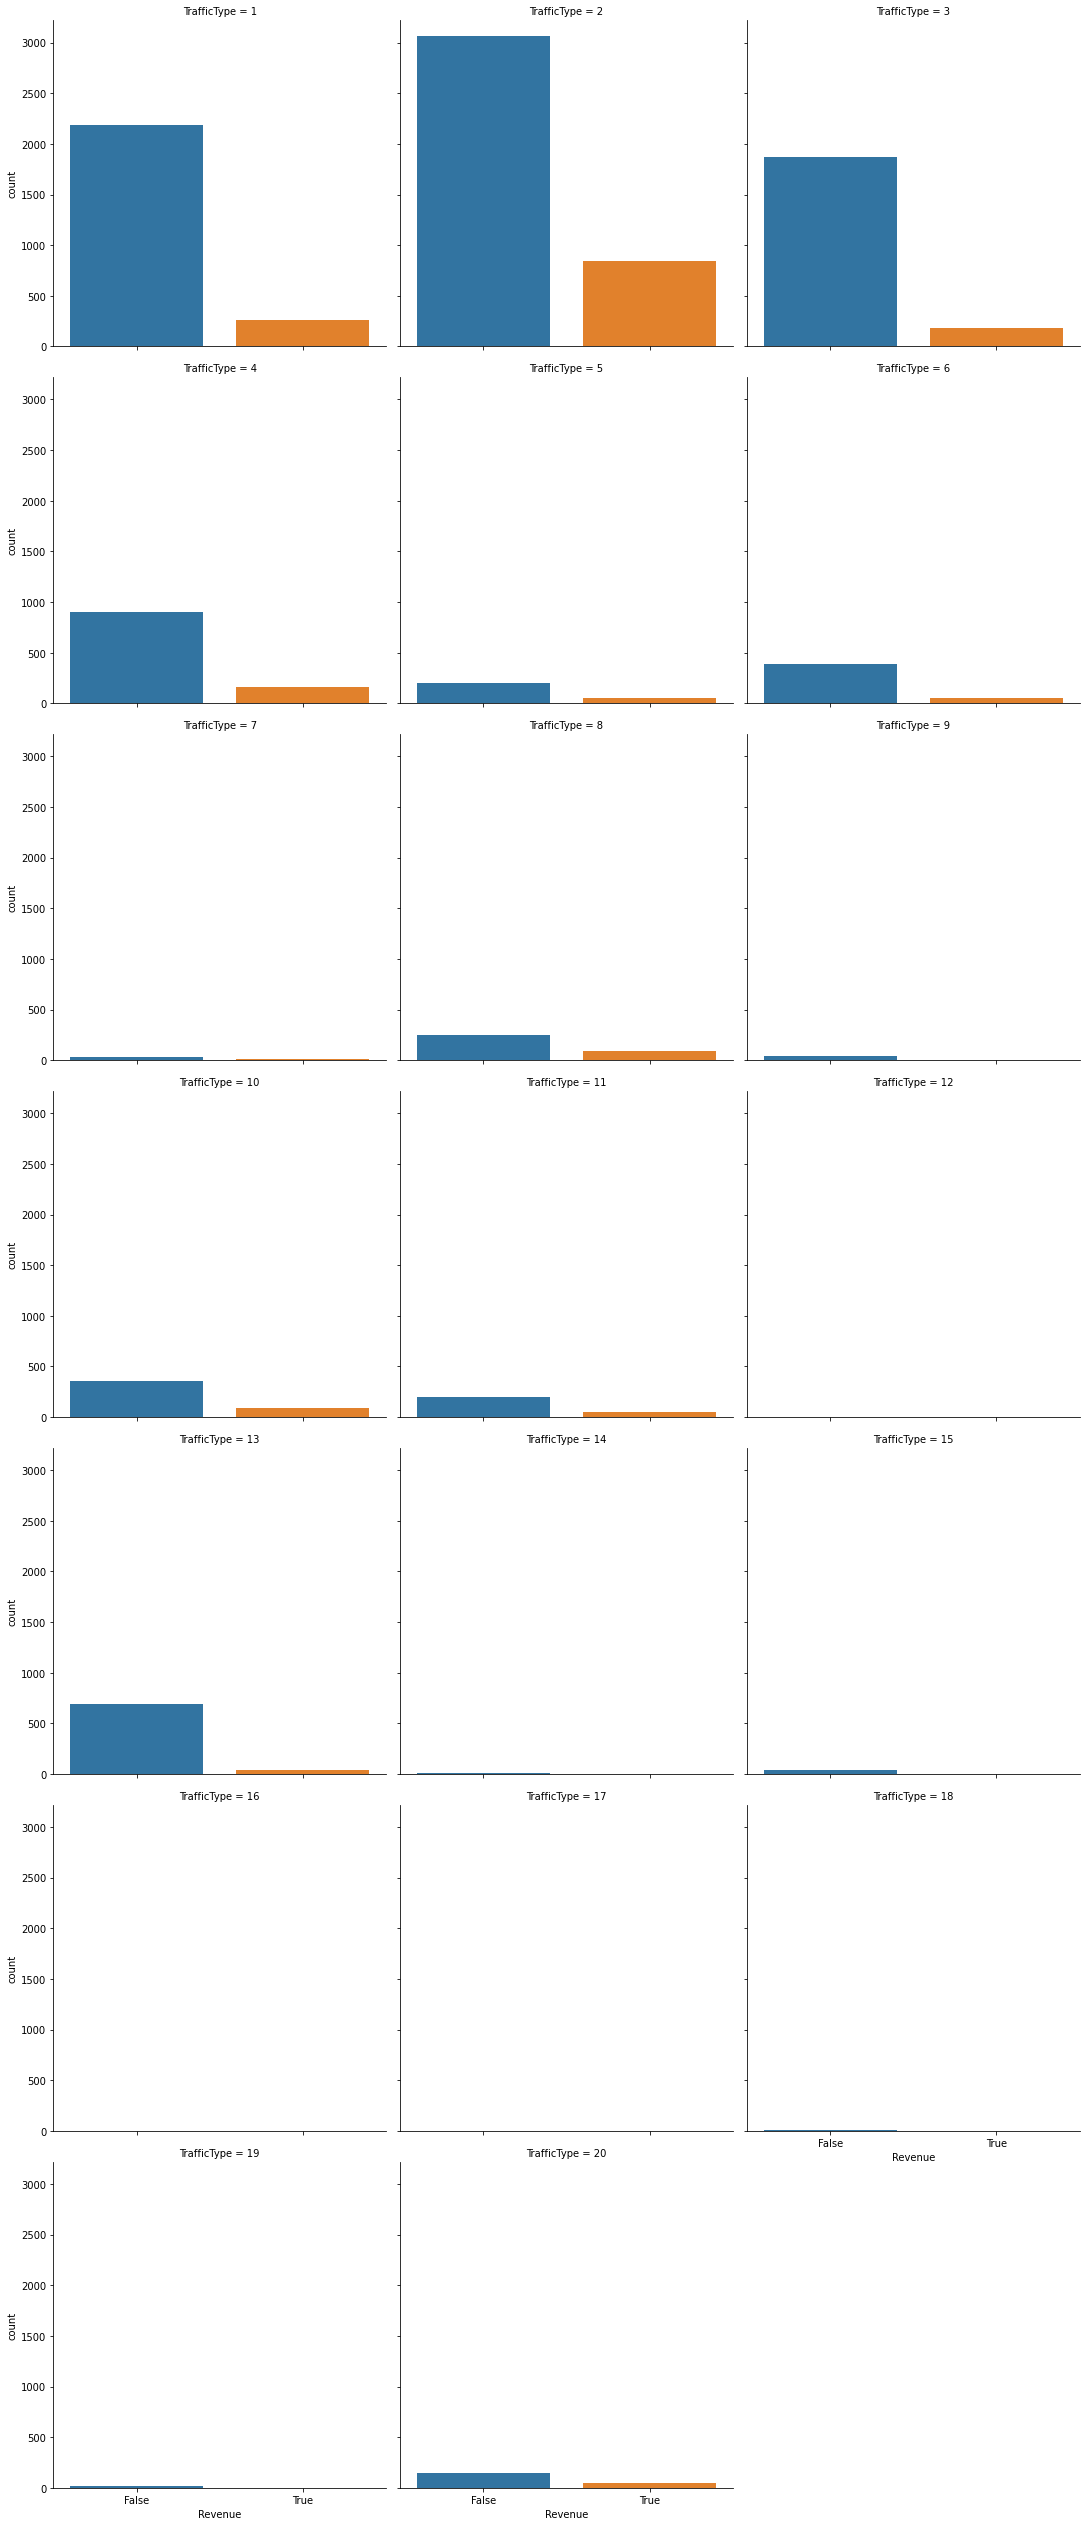

In [29]:
g = sns.catplot("Revenue", col="TrafficType", col_wrap=3,data=df,kind="count", height=5, aspect=1)
plt.show()

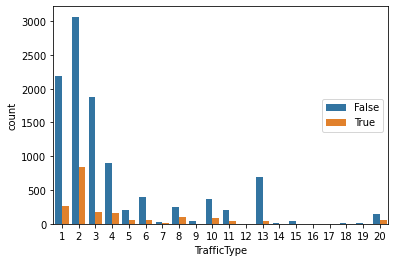

In [30]:
# but here better plot will be countplot as we dont have 
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

**revenue generation happens more from source 2 , notice the yellow bar**

### Analyzing the Relationship between Revenue and Other Variables

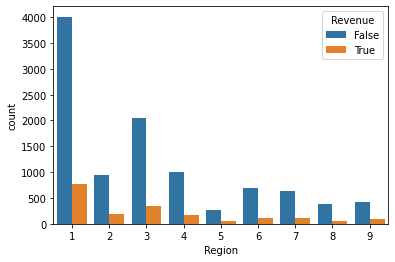

In [32]:
sns.countplot(x="Region", hue="Revenue", data=df)
plt.show()

From the preceding plot, we can see that region 1 accounts for most sales, and region 3 the second most. With this information, we can plan our marketing and supply chain activities in a better way. For example, we might propose building a warehouse specifically catering to the needs of region 1 to increase delivery rates and ensure that products in the highest demand are always well stocked.

Create a countplot between revenue and browser type that shows the number of users per browser type and whether or not they made a purchase (True or False):

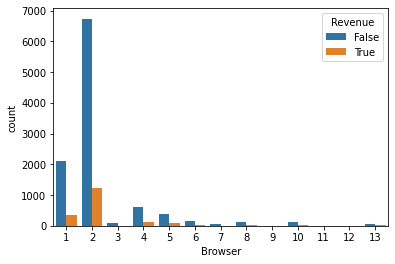

In [33]:
sns.countplot(x="Browser", hue="Revenue", data=df)
plt.show()

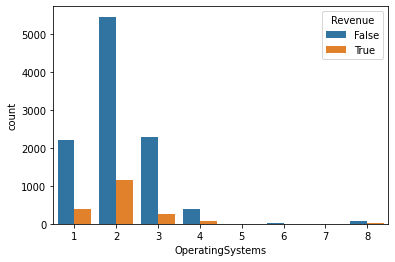

In [35]:
# now for OS type
sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.show()

### Linear relationships or Collinearlity 

- The value of one variable increases, while the other variable's value increases
- The value of one variable increases, while the other variable's value decreases

In [36]:
# Bounce Rate versus Exit Rate
# to study if there is positive or negative impact 

# The linear relationship between bounce rate versus exit rate can be studied by plotting an LM plot from seaborn.

#We are setting the x axis as BounceRates, and the y axis as ExitRates.

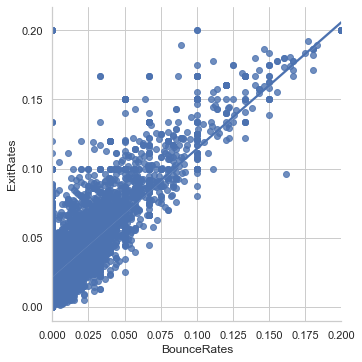

In [37]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

**there is a positive correlation between the bounce rate and the exit rate. With the increase in bounce rate, the exit rate of the page increases**

In [38]:
# Page Value versus Bounce Rate

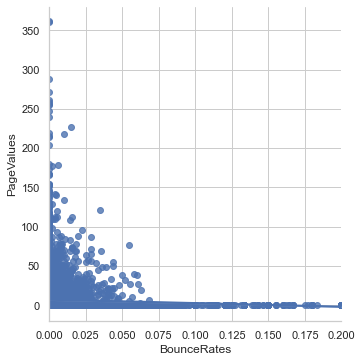

In [39]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="PageValues", data=df)

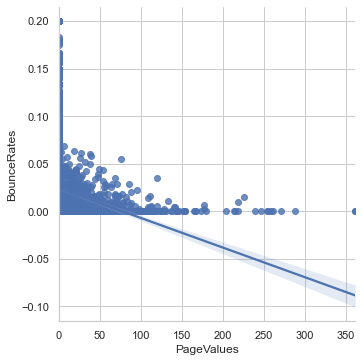

In [40]:
sns.set(style="whitegrid")
ax = sns.lmplot(y="BounceRates", x="PageValues", data=df)

**this shows there is a negative correlation**

### Clustering

K-means clustering is a clustering algorithm based on iterations where similar data points are grouped into a cluster based on their closeness to the cluster centroid. This means that the model runs iteratively to find the cluster centroid.

The optimum number of clusters for a dataset is found by using the elbow method.

You need to complete the following steps to find the optimum cluster value through the elbow method:

1. Compute k-means clustering for different values of k.
2. Vary the value of K from 1-10 in increments of 1.
3. For each k, calculate the total cluster sum of square WSS.
4. Plot the curve for WSS.

In [42]:
#K-means Clustering for Informational Duration versus Exit Rate